In [185]:
import pandas as pd
df=pd.read_csv("diabetes_dataset.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Picking Features

In [186]:
# Features

# All
# x=df.drop(['Outcome'], axis=1)

# Only 3
x=df.loc[:,['Glucose', 'BMI', 'Age']].to_numpy()
x[:5]

array([[148. ,  33.6,  50. ],
       [ 85. ,  26.6,  31. ],
       [183. ,  23.3,  32. ],
       [ 89. ,  28.1,  21. ],
       [137. ,  43.1,  33. ]])

In [187]:
# Target

y=df.Outcome
y[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [189]:
model = DecisionTreeClassifier(max_leaf_nodes=6)

model = model.fit(x_train,y_train)

vars(model)

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': 6,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'n_features_in_': 3,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': np.int64(2),
 'max_features_': 3,
 'tree_': <sklearn.tree._tree.Tree at 0x1d36f755300>}

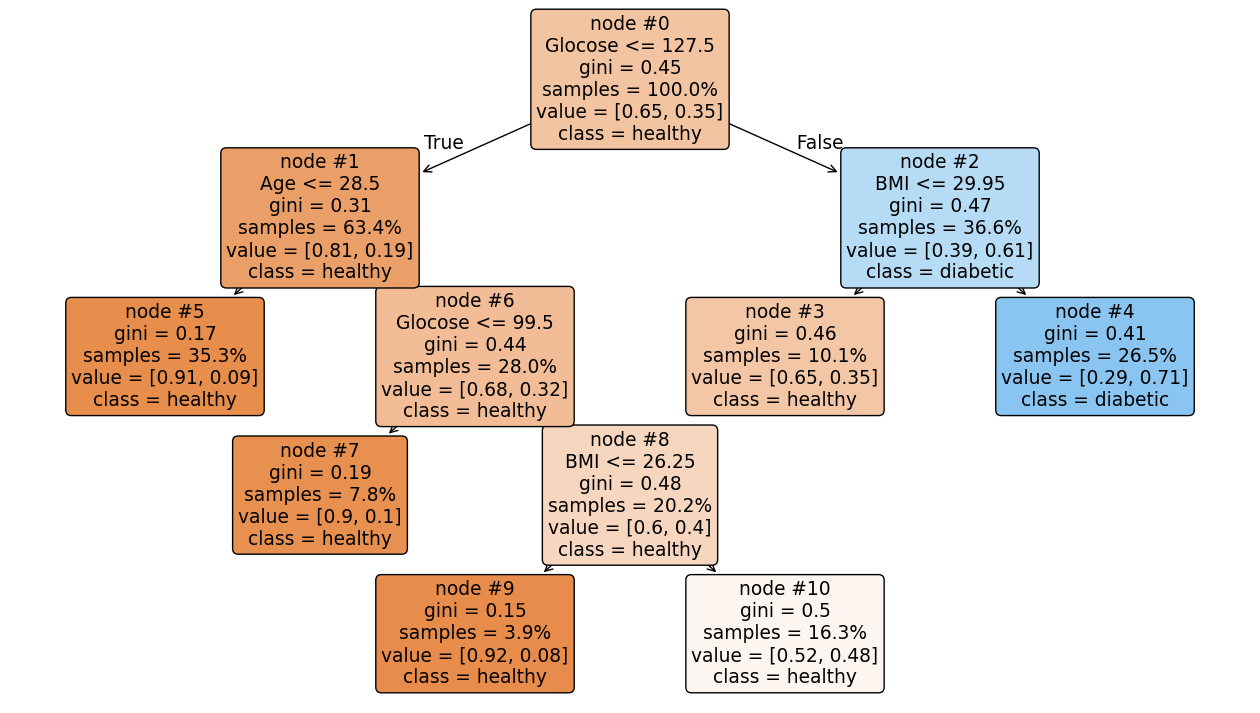

In [190]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))



plot_tree(model,
          #the names of the input features, in the order of the columns in X_train
          feature_names=["Glocose", "BMI", "Age"],
          #show percentage of samples instead of numbers
          proportion=True,
          #color nodes by purity
          filled=True,
          #the names of the classes
          class_names=['healthy','diabetic'],
          #how many digits after the dot to show
          precision=2,
          #cute rounded nodes
          rounded=True,
          node_ids=True)
plt.show()

In [191]:
y_pred = model.predict(x_test)


print('predicted:')
print(y_pred[:10])
print(y_pred.shape, end = '\n\n')

print('true outcome:')
print(y_test[:10])
print(y_test.shape)


predicted:
[0 0 0 0 0 0 0 0 0 0]
(154,)

true outcome:
285    0
101    0
581    0
352    0
726    0
472    0
233    0
385    0
556    0
59     0
Name: Outcome, dtype: int64
(154,)


In [192]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_true = y_test,y_pred = y_pred),
             index=['Actual_0', 'Actual_1'],
             columns=['Pred_0','Pred_1'])

,Pred_0,Pred_1
Actual_0,89,10
Actual_1,21,34


In [193]:
# which proportion of the identified 'cases', i.e. 'positives' are actually cases

from sklearn.metrics import precision_score
round(precision_score(y_true = y_test,y_pred = y_pred, pos_label = 1),2)

0.77

In [194]:
# which proportion of the true 'cases', i.e. positive we have found.

from sklearn.metrics import recall_score
round(recall_score(y_true = y_test,y_pred = y_pred, pos_label = 1),2)

0.62

In [195]:
# Feature Importance

model.feature_importances_

array([0.67329148, 0.20847479, 0.11823373])